Accuracy: 0.8944090167581196
[[11656     0    68]
 [  508  2576   201]
 [ 2071     0  9892]]
predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Moderate Risk' 'High Risk'
 'Moderate Risk']


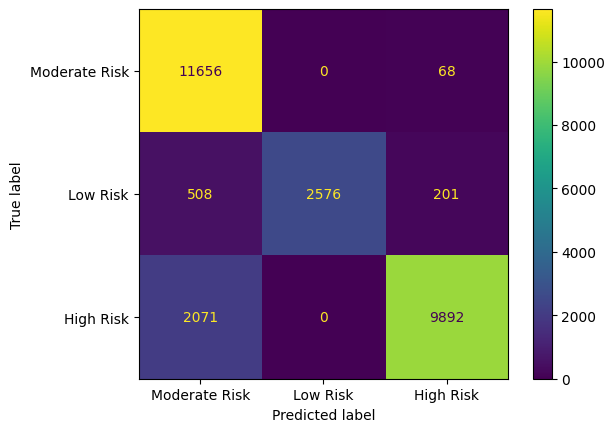

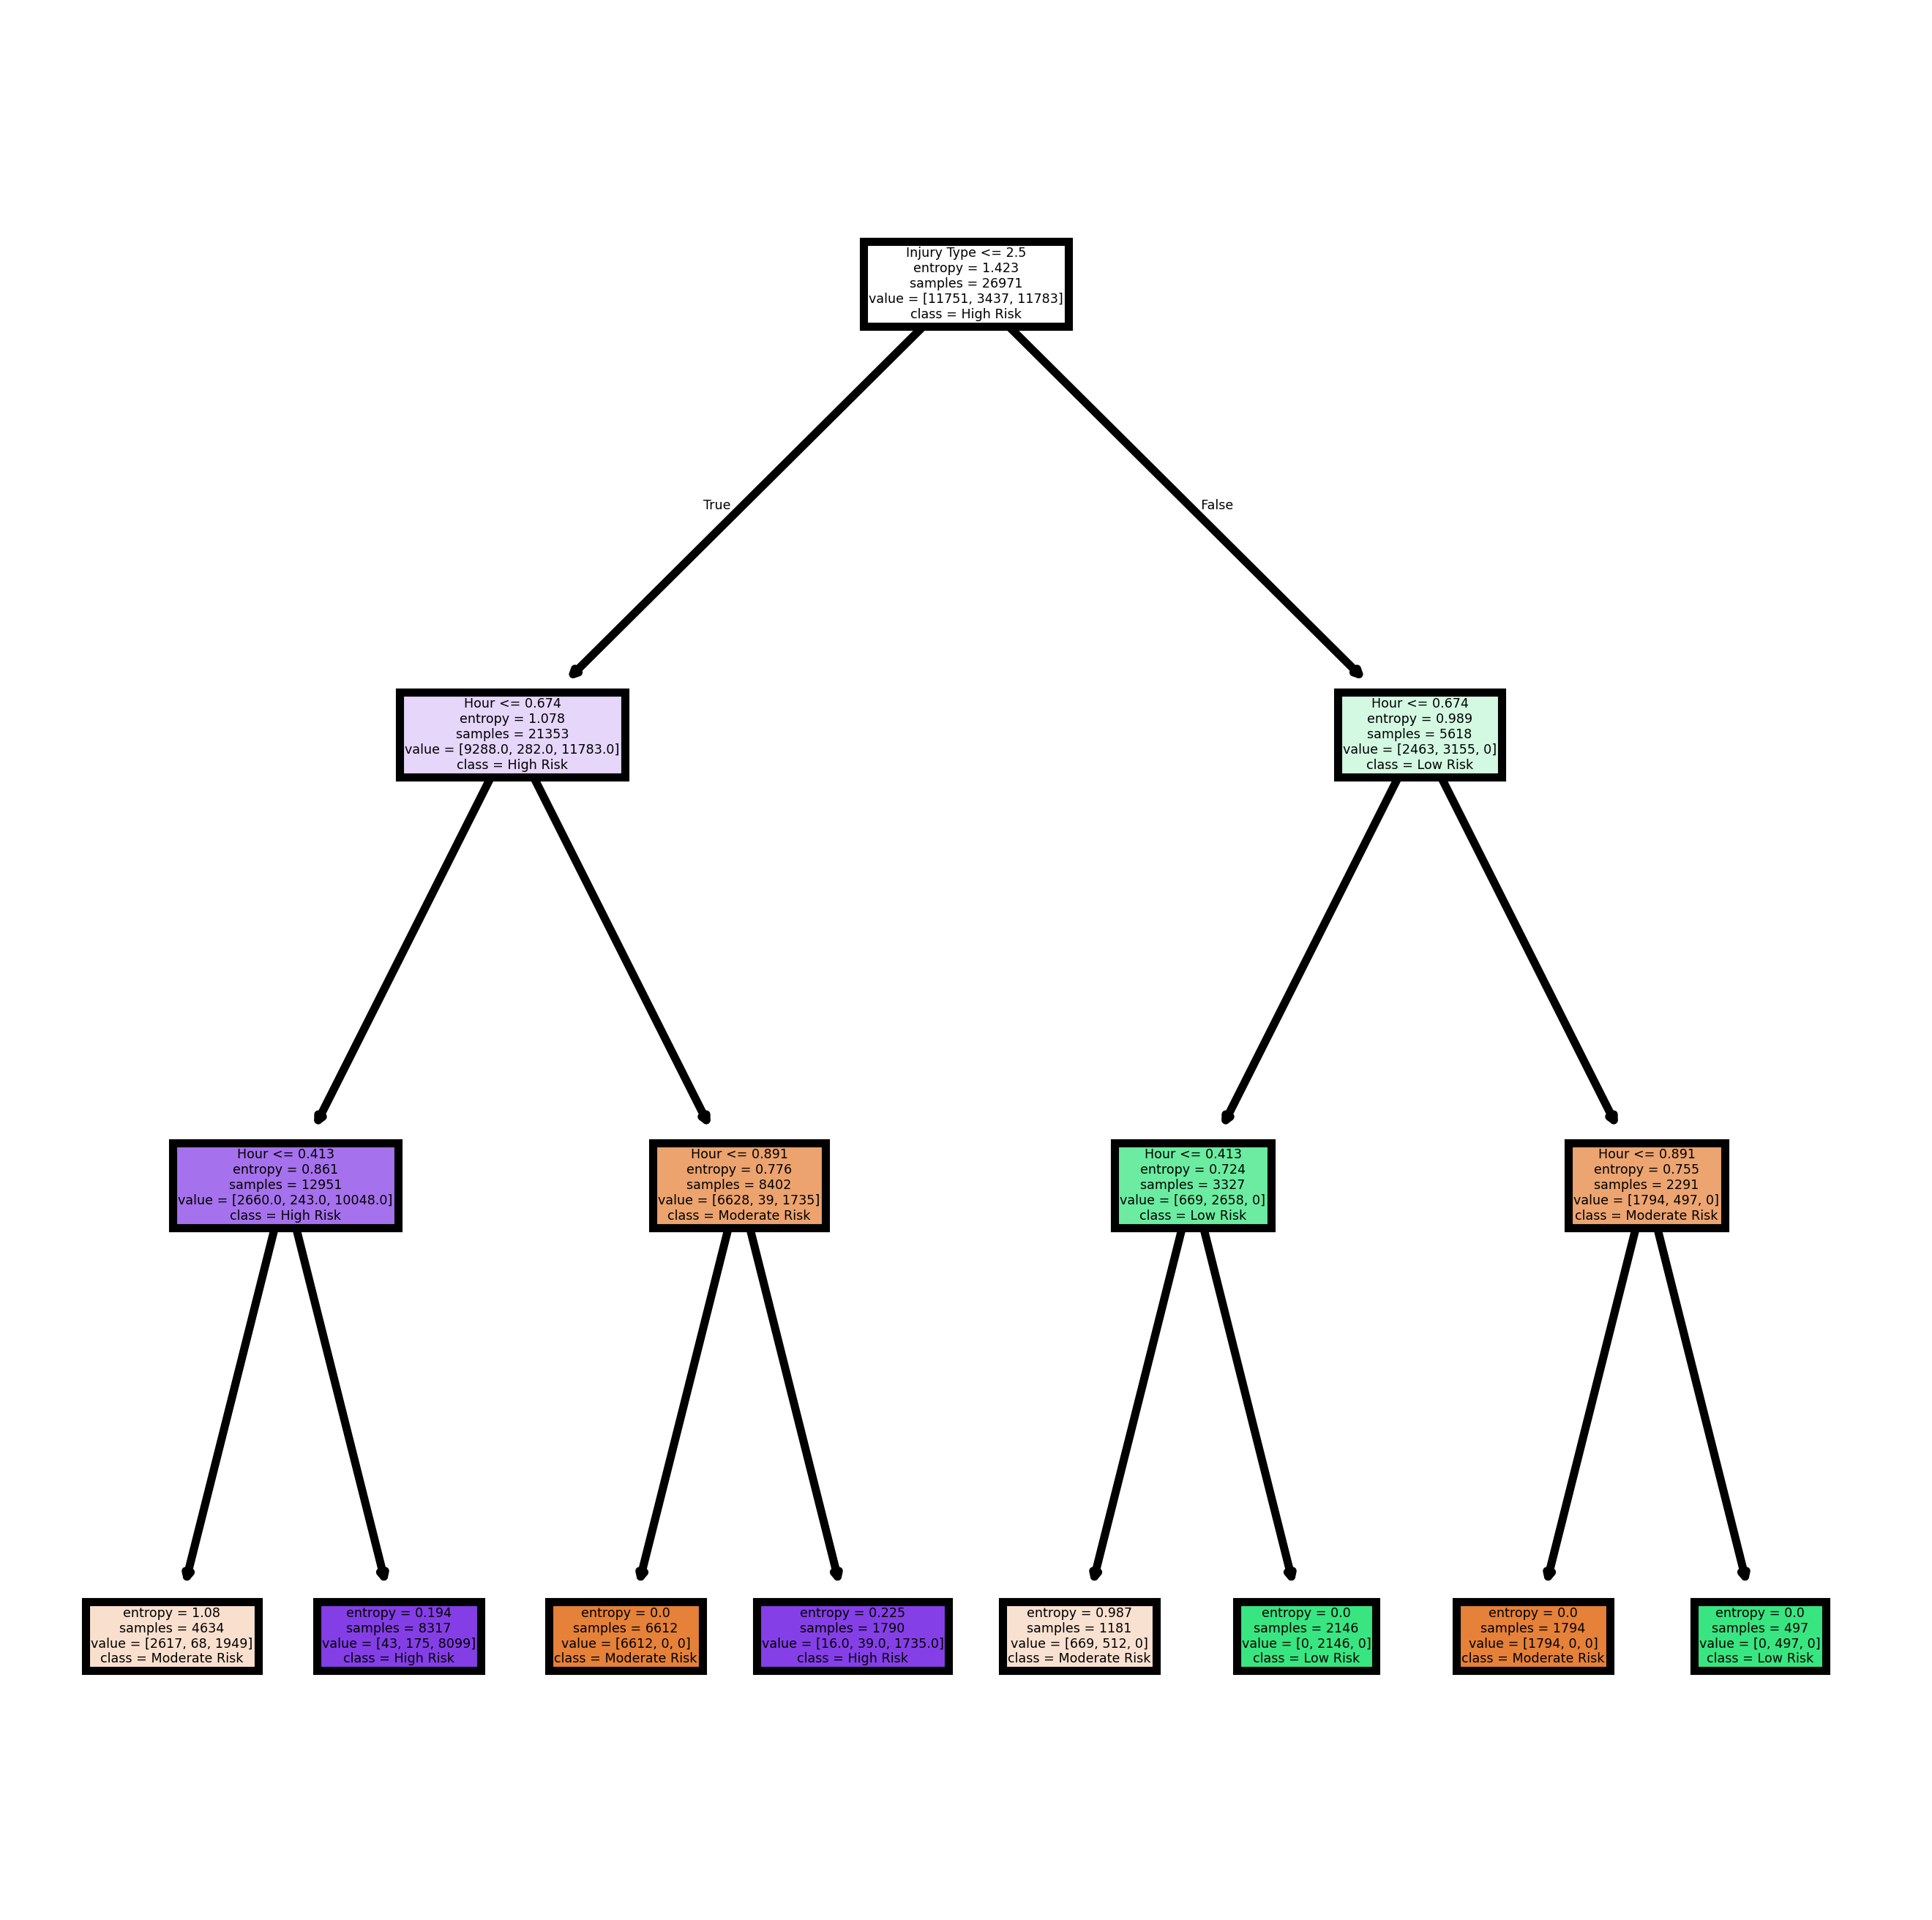

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree


#load data
df = pd.read_csv("Dataset/processed_data.csv")

#split dataset in features and target variable
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level
X = df[fn] # feature names
y = df['Risk Level'] # Target variable

#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.5,random_state=1) # %50 test %50 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)
